In [470]:
from collections import Counter
from sklearn.model_selection import train_test_split as tts
from sklearn.model_selection import GridSearchCV, StratifiedKFold
from sklearn.pipeline import make_pipeline
from imblearn.pipeline import Pipeline as imbpipeline
from sklearn.preprocessing import MinMaxScaler
from imblearn.over_sampling import SMOTE
from imblearn.metrics import classification_report_imbalanced
from sklearn.metrics import precision_score, recall_score, f1_score, roc_auc_score, accuracy_score, classification_report
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import Pipeline
from sklearn.svm import LinearSVC, NuSVC, SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
from sklearn.linear_model import LogisticRegressionCV, LogisticRegression, SGDClassifier
from sklearn.ensemble import BaggingClassifier, ExtraTreesClassifier, RandomForestClassifier
import warnings
warnings.filterwarnings('ignore')


from yellowbrick.classifier import ClassificationReport

import numpy as np 
import pandas as pd

In [471]:
#Import the Dataset we are working with

In [472]:
data_url = 'https://raw.githubusercontent.com/georgetown-analytics/Formula1/main/data/processed/final_features.csv'
data_df = pd.read_csv(data_url, sep = ',', engine = 'python', encoding = 'latin-1')

**Modeling**

In [473]:
data_df.head()

,raceId,driverId,CompletionStatus,alt,grid,trackType,average_lap_time,minimum_lap_time,year,PRCP,...,oneHot_circuits_1,oneHot_circuits_2,oneHot_circuits_3,oneHot_circuits_4,oneHot_circuits_5,oneHot_circuits_6,alt_trans,PRCP_trans,normalized_minLapTime,normalized_avgLapTime
0,1,2,1,10,9,1,97635.672414,88283,2009,0.0,...,0,1,0,0,0,0,2.890372,0.0,0.994132,0.002958
1,1,3,1,10,5,1,97612.172414,87706,2009,0.0,...,0,1,0,0,0,0,2.890372,0.0,0.987635,0.002717
2,1,4,1,10,10,1,97597.637931,88712,2009,0.0,...,0,1,0,0,0,0,2.890372,0.0,0.998963,0.002568
3,1,6,0,10,11,1,91822.235294,89923,2009,0.0,...,0,1,0,0,0,0,2.890372,0.0,1.012600,-0.058430
4,1,7,1,10,17,1,97622.103448,89823,2009,0.0,...,0,1,0,0,0,0,2.890372,0.0,1.011474,0.002819


In [474]:
data_df.shape

(9258, 22)

In [475]:
data_df.isna().sum()

raceId                   0
driverId                 0
CompletionStatus         0
alt                      0
grid                     0
trackType                0
average_lap_time         0
minimum_lap_time         0
year                     0
PRCP                     0
TAVG                     0
isHistoric               0
oneHot_circuits_1        0
oneHot_circuits_2        0
oneHot_circuits_3        0
oneHot_circuits_4        0
oneHot_circuits_5        0
oneHot_circuits_6        0
alt_trans                0
PRCP_trans               0
normalized_minLapTime    0
normalized_avgLapTime    0
dtype: int64

In [476]:
#Set X and y

In [477]:
y = data_df["CompletionStatus"]

In [478]:
X = data_df.loc[:,['trackType', 'alt_trans', 'grid', 'normalized_minLapTime', 'normalized_avgLapTime', 'year', 'PRCP_trans', 
'TAVG', 'isHistoric', "oneHot_circuits_1", "oneHot_circuits_2", "oneHot_circuits_3",
"oneHot_circuits_4","oneHot_circuits_5","oneHot_circuits_6"]]

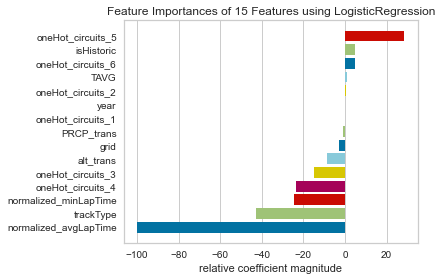

<AxesSubplot:title={'center':'Feature Importances of 15 Features using LogisticRegression'}, xlabel='relative coefficient magnitude'>

In [479]:
from yellowbrick.features import FeatureImportances

model = LogisticRegression()
viz = FeatureImportances(model)
viz.fit(X, y)
viz.show()

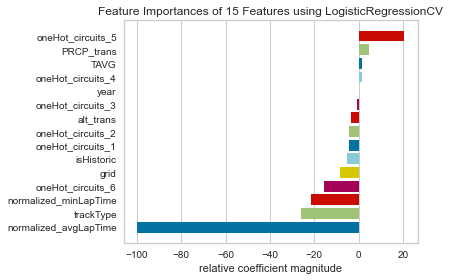

<AxesSubplot:title={'center':'Feature Importances of 15 Features using LogisticRegressionCV'}, xlabel='relative coefficient magnitude'>

In [480]:
model = LogisticRegressionCV(cv=3)
viz = FeatureImportances(model)
viz.fit(X, y)
viz.show()

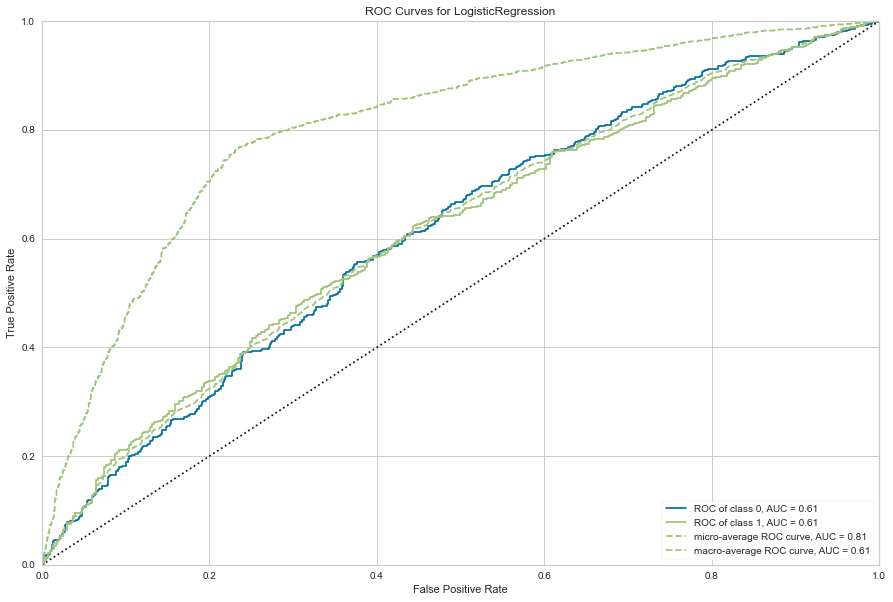

<AxesSubplot:title={'center':'ROC Curves for LogisticRegression'}, xlabel='False Positive Rate', ylabel='True Positive Rate'>

In [481]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split

from yellowbrick.classifier import ROCAUC


# Specify the classes of the target
classes = [0, 1]

# Create the train and test data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# Instantiate the visualizer with the classification model
visualizer = ROCAUC(LogisticRegression(
    multi_class="auto", solver="liblinear"
    ), classes=classes, size=(1080, 720)
)
visualizer.fit(X_train, y_train)  # Fit the training data to the visualizer
visualizer.score(X_test, y_test)  # Evaluate the model on the test data
visualizer.show()                 # Draw the data

In [482]:
#Test our data on various estimators.

X_train, X_test, y_train, y_test = tts(X, y, test_size=0.20, random_state = 3)

def score_model(X_train, y_train, X_test, y_test, estimator, **kwargs):
   
    estimator.fit(X_train, y_train, **kwargs)  
    
    expected  = y_test
    predicted = estimator.predict(X_test)
    
    # Compute and return F1
    print("{}: {}".format(estimator.__class__.__name__, f1_score(expected, predicted)))
    

# Instantiate the classification models
models = [
    SVC(gamma='auto'), 
    LinearSVC(),  
    KNeighborsClassifier(), 
    LogisticRegression(solver='lbfgs'), 
    LogisticRegressionCV(cv=3), 
    BaggingClassifier(), 
    ExtraTreesClassifier(n_estimators=100), 
    RandomForestClassifier(n_estimators=100)
]

for model in models:
    score_model(X_train, y_train, X_test, y_test, model)


SVC: 0.8678304239401496
LinearSVC: 0.8724505327245053
KNeighborsClassifier: 0.8472810159557147
LogisticRegression: 0.8724505327245053
LogisticRegressionCV: 0.8735141725083816
BaggingClassifier: 0.8917418459403192
ExtraTreesClassifier: 0.8901464713715046
RandomForestClassifier: 0.9053691275167786


In [483]:
data_df.CompletionStatus.value_counts()

1    7108
0    2150
Name: CompletionStatus, dtype: int64

In [484]:
# Possibly, Data leakage happening caused by a class imbalance. 

In [485]:
#Now to use SMOTE to address this issue. 

In [486]:
from imblearn.over_sampling import SMOTE, ADASYN

X_resampled, y_resampled = SMOTE().fit_resample(X, y)
print(sorted(Counter(y_resampled).items()))

[(0, 7108), (1, 7108)]


In [487]:
#Now to test various models on our resampled data

In [488]:
def score_model(X_resampled, y_resampled, X_test, y_test, estimator, **kwargs):
    """
    Test various estimators.
    """
    # Instantiate the classification model and visualizer
    estimator.fit(X_resampled, y_resampled, **kwargs)  
    
    expected  = y_test
    predicted = estimator.predict(X_test)
    
    # Compute and return F1 (harmonic mean of precision and recall)
    print("{}: {}".format(estimator.__class__.__name__, f1_score(expected, predicted)))
    

models = [
    SVC(gamma='auto'), 
    NuSVC(gamma='auto'), 
    LinearSVC(),  
    KNeighborsClassifier(), 
    LogisticRegression(solver='lbfgs'), 
    LogisticRegressionCV(cv=3), 
    BaggingClassifier(), 
    ExtraTreesClassifier(n_estimators=100), 
    RandomForestClassifier(n_estimators=100)
]

for model in models:
    score_model(X_resampled, y_resampled, X_test, y_test, model)

SVC: 0.8266464799394398
NuSVC: 0.8619430241051862
LinearSVC: 0.8724505327245053
KNeighborsClassifier: 0.843335931410756
LogisticRegression: 0.797887323943662
LogisticRegressionCV: 0.7357987037743042
BaggingClassifier: 0.991921320688444
ExtraTreesClassifier: 1.0
RandomForestClassifier: 1.0


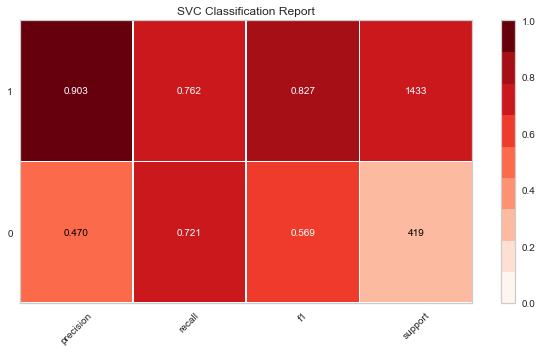

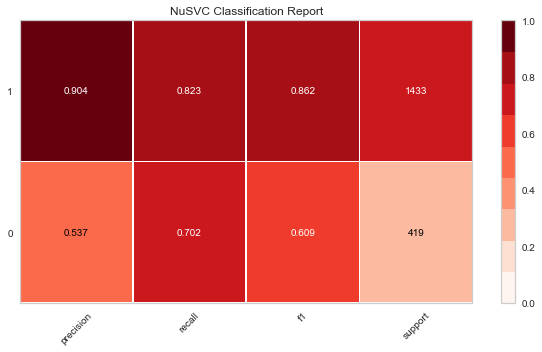

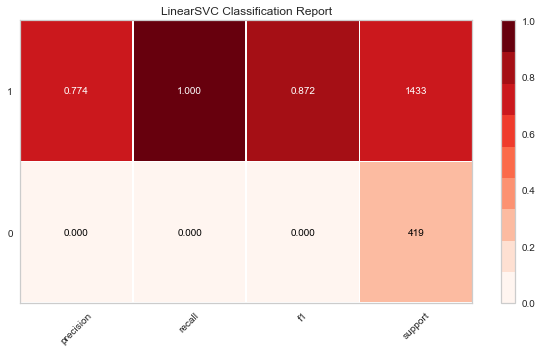

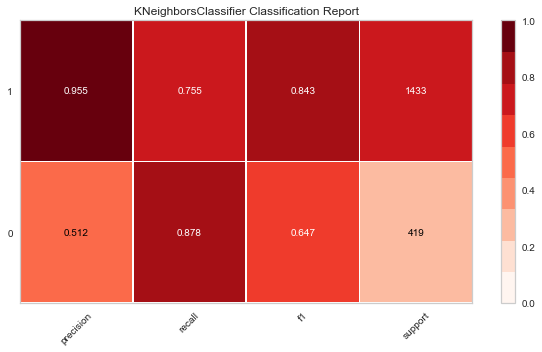

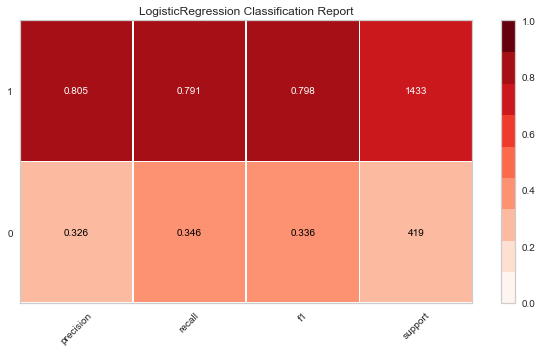

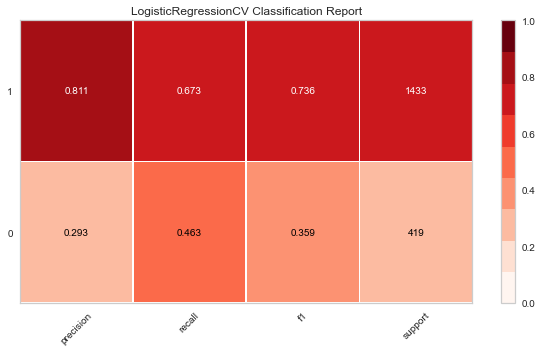

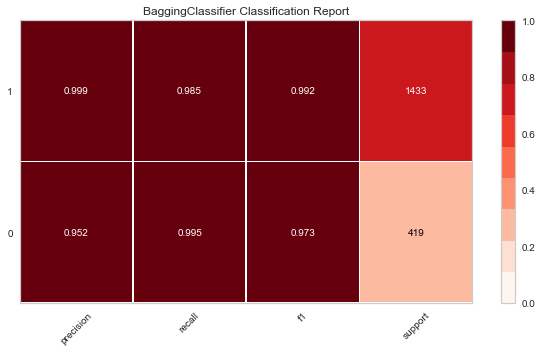

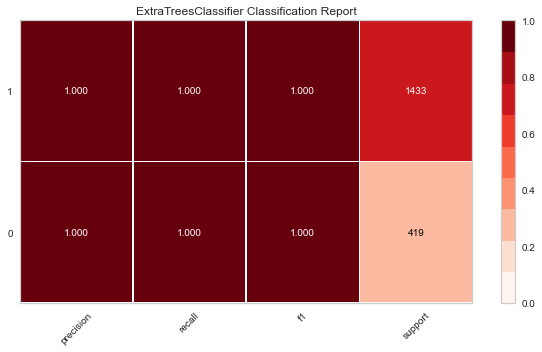

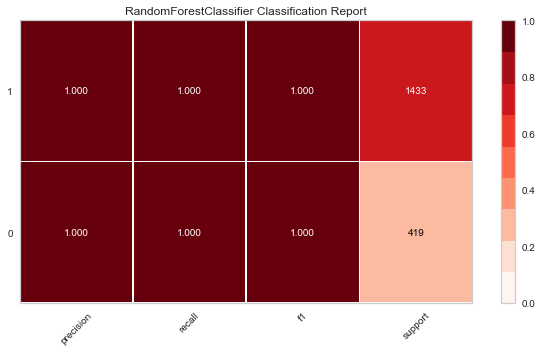

In [489]:
def visualize_model(X, y, estimator):
    """
    Test various estimators.
    """ 
    # Instantiate the classification model and visualizer
    visualizer = ClassificationReport(
        estimator, 
        classes=[0,1], 
        cmap="Reds", 
        support=True,
        size=(600, 360)
    )
    
    X_train, X_test, y_train, y_test = tts(X, y, test_size=0.20, random_state = 3)
    X_resampled, y_resampled = SMOTE().fit_resample(X_train, y_train)
    visualizer.fit(X_resampled, y_resampled)
    visualizer.score(X_test, y_test)
    visualizer.show()  

for model in models:
    visualize_model(X, y, model)

In [490]:
#Logisitc Regression, LogisticRegressionCV, SVC, KNeighborsClassifier seem to be our most viable models

# **Evaluating Our Classification Models**

**Logistic Regression**

In [559]:
# train a logistic regression model on the resammpled data 
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression(solver='lbfgs')
logreg.fit(X_resampled, y_resampled)

LogisticRegression()

In [560]:
y_pred_class = logreg.predict(X_test)

In [561]:
#Classification Accuracy

from sklearn import metrics
print(metrics.accuracy_score(y_test, y_pred_class))

0.6900647948164147


In [562]:


# examine the class distribution of the testing set (using a Pandas Series method)
y_test.value_counts()

1    1433
0     419
Name: CompletionStatus, dtype: int64

In [563]:
# calculate the percentage of ones
y_test.mean()

0.7737580993520519

In [564]:
# calculate the percentage of zeros
1 - y_test.mean()

0.22624190064794814

In [565]:
# calculate null accuracy
max(y_test.mean(), 1 - y_test.mean())

0.7737580993520519

In [566]:
# IMPORTANT: first argument is true values, second argument is predicted values
print(metrics.confusion_matrix(y_test, y_pred_class))

[[ 145  274]
 [ 300 1133]]


In [567]:
# save confusion matrix and slice into four pieces
confusion = metrics.confusion_matrix(y_test, y_pred_class)
TP = confusion[1, 1]
TN = confusion[0, 0]
FP = confusion[0, 1]
FN = confusion[1, 0]

In [568]:
#Classification Accuracy: Overall, how often is the classifier correct?

print((TP + TN) / (TP + TN + FP + FN))
print(metrics.accuracy_score(y_test, y_pred_class))

0.6900647948164147
0.6900647948164147


In [569]:
#Classification Error: Overall, how often is the classifier incorrect?

print((FP + FN) / (TP + TN + FP + FN))
print(1 - metrics.accuracy_score(y_test, y_pred_class))

0.3099352051835853
0.3099352051835853


In [570]:
#Sensitivity: When the actual value is positive, how often is the prediction correct?

print(TP / (TP + FN))
print(metrics.recall_score(y_test, y_pred_class))

0.790648988136776
0.790648988136776


In [571]:
#Specificity: When the actual value is negative, how often is the prediction correct?
#In this case, when we predict crash, how often are we correct?
#In this case we want to optimize specificity


print(TN / (TN + FP))

0.3460620525059666


In [572]:
#False Positive Rate: When the actual value is negative, how often is the prediction incorrect?

print(FP / (TN + FP))

0.6539379474940334


In [573]:
#Precision: When a positive value is predicted, how often is the prediction correct?

print(TP / (TP + FP))
print(metrics.precision_score(y_test, y_pred_class))

0.8052594171997157
0.8052594171997157


In [574]:
#This logistic regression model performed well on predicting finishes, but we want a model better suited at 
#predicting crashes.
#Now to try our other high performing classifiers and see which one is most specific. 

**Logistic Regression CV**

In [575]:
# train a logistic regression CV model on the resammpled data 
from sklearn.linear_model import LogisticRegressionCV
logregcv = LogisticRegressionCV(cv=3)
logregcv.fit(X_resampled, y_resampled)

LogisticRegressionCV(cv=3)

In [576]:
y_pred_class = logregcv.predict(X_test)

In [577]:
#Classification Accuracy

from sklearn import metrics
print(metrics.accuracy_score(y_test, y_pred_class))

0.6258099352051836


In [578]:
# examine the class distribution of the testing set (using a Pandas Series method)
y_test.value_counts()

1    1433
0     419
Name: CompletionStatus, dtype: int64

In [579]:
# calculate the percentage of ones
y_test.mean()

0.7737580993520519

In [580]:
# calculate the percentage of zeros
1 - y_test.mean()

0.22624190064794814

In [581]:
# calculate null accuracy
max(y_test.mean(), 1 - y_test.mean())

0.7737580993520519

In [582]:
# IMPORTANT: first argument is true values, second argument is predicted values
print(metrics.confusion_matrix(y_test, y_pred_class))

[[194 225]
 [468 965]]


In [583]:
# save confusion matrix and slice into four pieces
confusion = metrics.confusion_matrix(y_test, y_pred_class)
TP = confusion[1, 1]
TN = confusion[0, 0]
FP = confusion[0, 1]
FN = confusion[1, 0]

In [584]:
#Classification Accuracy: Overall, how often is the classifier correct?

print((TP + TN) / (TP + TN + FP + FN))
print(metrics.accuracy_score(y_test, y_pred_class))

0.6258099352051836
0.6258099352051836


In [585]:
#Classification Error: Overall, how often is the classifier incorrect?

print((FP + FN) / (TP + TN + FP + FN))
print(1 - metrics.accuracy_score(y_test, y_pred_class))

0.3741900647948164
0.3741900647948164


In [586]:
#Sensitivity: When the actual value is positive, how often is the prediction correct?

print(TP / (TP + FN))
print(metrics.recall_score(y_test, y_pred_class))

0.6734124214933705
0.6734124214933705


In [587]:
#Specificity: When the actual value is negative, how often is the prediction correct?
#In this case, when we predict crash, how often are we correct?
#In this case we want to optimize specificity


print(TN / (TN + FP))

0.4630071599045346


In [588]:
#False Positive Rate: When the actual value is negative, how often is the prediction incorrect?

print(FP / (TN + FP))

0.5369928400954654


In [589]:
#Precision: When a positive value is predicted, how often is the prediction correct?

print(TP / (TP + FP))
print(metrics.precision_score(y_test, y_pred_class))

0.8109243697478992
0.8109243697478992


**SVC**

In [590]:
# train a linear SVC model on the resammpled data 
from sklearn.svm import SVC
svc = SVC()
svc.fit(X_resampled, y_resampled)

SVC()

In [591]:
y_pred_class = svc.predict(X_test)

In [592]:
#Classification Accuracy

from sklearn import metrics
print(metrics.accuracy_score(y_test, y_pred_class))

0.6268898488120951


In [593]:
#Null Accuracy - accuracy that could be achieved by always predicting the most frequent class

# examine the class distribution of the testing set (using a Pandas Series method)
y_test.value_counts()

1    1433
0     419
Name: CompletionStatus, dtype: int64

In [594]:
# IMPORTANT: first argument is true values, second argument is predicted values
print(metrics.confusion_matrix(y_test, y_pred_class))

[[266 153]
 [538 895]]


In [595]:
# save confusion matrix and slice into four pieces
confusion = metrics.confusion_matrix(y_test, y_pred_class)
TP = confusion[1, 1]
TN = confusion[0, 0]
FP = confusion[0, 1]
FN = confusion[1, 0]

In [596]:
#Classification Accuracy: Overall, how often is the classifier correct?

print((TP + TN) / (TP + TN + FP + FN))
print(metrics.accuracy_score(y_test, y_pred_class))

0.6268898488120951
0.6268898488120951


In [597]:
#Classification Error: Overall, how often is the classifier incorrect?

print((FP + FN) / (TP + TN + FP + FN))
print(1 - metrics.accuracy_score(y_test, y_pred_class))

0.37311015118790497
0.3731101511879049


In [598]:
#Sensitivity: When the actual value is positive, how often is the prediction correct?

print(TP / (TP + FN))
print(metrics.recall_score(y_test, y_pred_class))

0.6245638520586183
0.6245638520586183


In [599]:
#Specificity: When the actual value is negative, how often is the prediction correct?
#In this case, when we predict crash, how often are we correct?
#In this case we want to optimize specificity


print(TN / (TN + FP))

0.6348448687350835


In [600]:
#False Positive Rate: When the actual value is negative, how often is the prediction incorrect?

print(FP / (TN + FP))

0.36515513126491644


In [601]:
#Precision: When a positive value is predicted, how often is the prediction correct?

print(TP / (TP + FP))
print(metrics.precision_score(y_test, y_pred_class))

0.8540076335877863
0.8540076335877863


**KNeighbors Classifier**

In [602]:
# train a KNeighbors Classifier model on the resammpled data 
from sklearn.neighbors import KNeighborsClassifier
knclassifier = KNeighborsClassifier()
knclassifier.fit(X_resampled, y_resampled)

KNeighborsClassifier()

In [603]:
y_pred_class = knclassifier.predict(X_test)

In [604]:
#Classification Accuracy

from sklearn import metrics
print(metrics.accuracy_score(y_test, y_pred_class))

0.7829373650107991


In [605]:
#Null Accuracy - accuracy that could be achieved by always predicting the most frequent class

# examine the class distribution of the testing set (using a Pandas Series method)
y_test.value_counts()

1    1433
0     419
Name: CompletionStatus, dtype: int64

In [606]:
# IMPORTANT: first argument is true values, second argument is predicted values
print(metrics.confusion_matrix(y_test, y_pred_class))

[[ 368   51]
 [ 351 1082]]


In [607]:
# save confusion matrix and slice into four pieces
confusion = metrics.confusion_matrix(y_test, y_pred_class)
TP = confusion[1, 1]
TN = confusion[0, 0]
FP = confusion[0, 1]
FN = confusion[1, 0]

In [608]:
#Classification Accuracy: Overall, how often is the classifier correct?

print((TP + TN) / (TP + TN + FP + FN))
print(metrics.accuracy_score(y_test, y_pred_class))

0.7829373650107991
0.7829373650107991


In [609]:
#Classification Error: Overall, how often is the classifier incorrect?

print((FP + FN) / (TP + TN + FP + FN))
print(1 - metrics.accuracy_score(y_test, y_pred_class))

0.21706263498920086
0.21706263498920086


In [610]:
#Sensitivity: When the actual value is positive, how often is the prediction correct?

print(TP / (TP + FN))
print(metrics.recall_score(y_test, y_pred_class))

0.755059316120028
0.755059316120028


In [611]:
#Specificity: When the actual value is negative, how often is the prediction correct?
#In this case, when we predict crash, how often are we correct?
#In this case we want to optimize specificity


print(TN / (TN + FP))

0.8782816229116945


In [612]:
#False Positive Rate: When the actual value is negative, how often is the prediction incorrect?

print(FP / (TN + FP))

0.12171837708830549


In [545]:
#Precision: When a positive value is predicted, how often is the prediction correct?

print(TP / (TP + FP))
print(metrics.precision_score(y_test, y_pred_class))

0.9549867608120035
0.9549867608120035


**Findings**

- KNeighborsClassifier seems to be our highest performing model. 
- The results are high but seem legitimate as data leakage does not seem to be taking place.  
- SVC, Logistic Regression, and Logistic Regression CV perform well and capture all of our data. 

**Next Steps**
- Increase threshold for prediciting crashes in order to increase specificity of the model.
- Evaluate ROC/AUC curves of models to choose a threshold that balances sensitivity and specificity in a way that makes sense for predicitng crashes. 
- Create modeling pipelines with appropriate preprocessing techniques to achieve higher performance. 
- Implement relevant hyperparameter tuning techniques to achieve higher model performance. 
- Evaluate features and consider feature reduction. 